<a href="https://colab.research.google.com/github/jaewon078/cnn-sign-language/blob/main/sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Sign Language Classification using Convolutional Neural Networks

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
class SignLanguage:
    def __init__(self):
        self.model = None

        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()

    def create_model(self):
      model = Sequential([
          Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
          MaxPooling2D(pool_size=(2, 2)),
          Conv2D(64, (3, 3), activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Conv2D(128, (3, 3), activation='relu'),
          MaxPooling2D(pool_size=(2, 2)),
          Flatten(),
          Dense(256, activation='relu'),
          Dropout(0.5),
          Dense(128, activation='relu'),
          Dropout(0.3),
          Dense(36, activation='softmax')
      ])

      optimizer = Adam(learning_rate=0.001)
      model.compile(optimizer=optimizer,
                    loss=keras.losses.categorical_crossentropy,
                    metrics=['accuracy'])

      self.model = model


    def prepare_data(self, images, labels):
      # Normalize image data
      images = images.astype('float32') / 255.0
      images = images.reshape(-1, 28, 28, 1)

      # Convert labels to categorical
      labels = keras.utils.to_categorical(labels, num_classes=36)

      # Split data into train and validation sets
      x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

      self.data["train"] = (x_train, y_train)
      self.data["test"] = (x_val, y_val)

      print(f"Training samples: {x_train.shape[0]}")
      print(f"Validation samples: {x_val.shape[0]}")


    def train(self, batch_size=128, epochs=50, verbose=1):
      x_train, y_train = self.data["train"]
      x_val, y_val = self.data["test"]

      # Data augmentation
      datagen = ImageDataGenerator(
          rotation_range=10,
          zoom_range=0.1,
          width_shift_range=0.1,
          height_shift_range=0.1
      )

      # Callbacks
      early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
      reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

      history = self.model.fit(
          datagen.flow(x_train, y_train, batch_size=batch_size),
          steps_per_epoch=len(x_train) // batch_size,
          epochs=epochs,
          validation_data=(x_val, y_val),
          verbose=verbose,
          callbacks=[early_stopping, reduce_lr]
      )
      return history

    def predict(self, data):
      # Ensure data is in the correct format
      data = data.astype('float32') / 255.0
      data = data.reshape(-1, 28, 28, 1)

      # Make predictions
      predictions = self.model.predict(data)
      return np.argmax(predictions, axis=1)

    def visualize_data(self, data):
        """
        Visualizing the hand gestures

        :param data: numpy array of images
        """
        if data is None: return

        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object

        :param history: return value from model.fit()
        """
        if history is None: return

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [ ]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [ ]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training samples: 21964
Validation samples: 5491


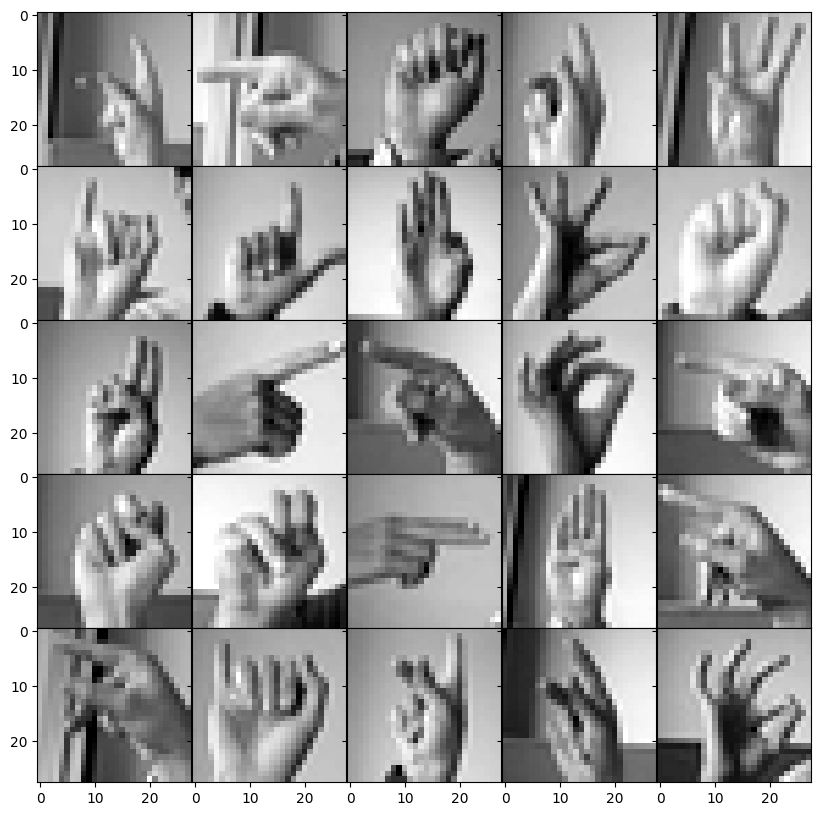

In [ ]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


171/171 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.0443 - loss: 3.3646 - val_accuracy: 0.2167 - val_loss: 2.5076 - learning_rate: 0.0010
Epoch 2/30
  1/171 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1641 - loss: 2.6653

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1641 - loss: 2.6653 - val_accuracy: 0.2271 - val_loss: 2.5090 - learning_rate: 0.0010
Epoch 3/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.2245 - loss: 2.4137 - val_accuracy: 0.5795 - val_loss: 1.2000 - learning_rate: 0.0010
Epoch 4/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3281 - loss: 1.7138 - val_accuracy: 0.5941 - val_loss: 1.1621 - learning_rate: 0.0010
Epoch 5/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.4823 - loss: 1.5051 - val_accuracy: 0.7441 - val_loss: 0.7218 - learning_rate: 0.0010
Epoch 6/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6250 - loss: 1.0816 - val_accuracy: 0.7503 - val_loss: 0.7103 - learning_rate: 0.0010
Epoch 7/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.6147 - loss: 1.1037 - val_accuracy: 0.8439 - val_loss: 0.4867 - learning_rate: 0.0010
Epoch 8/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - loss: 0.8516 - val_acc

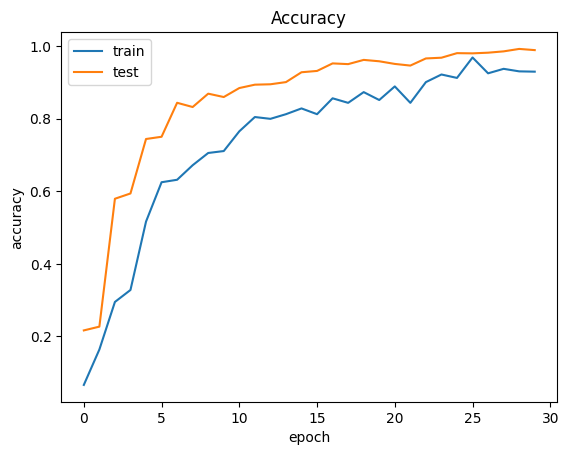

In [ ]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [ ]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.9774121583937535
